<a href="https://colab.research.google.com/github/arizzi/NNTutorial/blob/master/Tutorial3empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import useful stuff

In [1]:
from keras.layers import Input,Dense,Dropout
from keras.models import Model
import numpy as np
from math import *
from matplotlib import pyplot as plt 

Using TensorFlow backend.


## Lets generate some data

We now generate 3000 samples of Signal and Background.
Each sample has three features named x,y,z below.
Samples have a 4th entry that is the "label", 1 for signal, 0 for background

The two functions below are  generating random values for x,y,z with different distributions for signal and background 

### Exercise
1. Try changing the distributions of the x,y,z value (but do not make it too easy to distinguish signal from background!)

2. Try adding more (or less) features. How do you need to modify the line that access the labels?

3. Later on, also try changing the number of samples and see if with few samples overfit occurs

In [2]:
nsamples=300

def signalFeatures():
  x=np.random.rand()*3
  y=np.random.rand()*2
  z=cos(x*y)
  return x,y,z,1 #the last value here is the label, 1 = signal

def backgroundFeatures():
  x=np.random.normal(loc=1.5) #mean in 1.5
  y=1/(abs(x)+1)+np.random.rand()*0.7
  z=cos(x)
  return x,y,z,0 #the last value here is the label, 0 = signal



signal = np.asarray([signalFeatures() for x in range(nsamples)])
background = np.asarray([backgroundFeatures() for x in range(nsamples)])


print("Signal")
print("Shape is:", signal.shape)
print(signal)
print("Signal, one entry")
print(signal[0,:])
  

Signal
Shape is: (300, 4)
[[ 2.47680025  0.00254337  0.99998016  1.        ]
 [ 0.16488468  1.8421412   0.95422431  1.        ]
 [ 0.87321708  0.36665676  0.94918163  1.        ]
 ...
 [ 0.32703368  1.32083336  0.9081482   1.        ]
 [ 1.25832683  1.37120502 -0.15401229  1.        ]
 [ 1.91432512  0.46217436  0.63348142  1.        ]]
Signal, one entry
[2.47680025 0.00254337 0.99998016 1.        ]


### Exercise
4. How would you print "feature z" (i.e. feature at index 2) for all entries?
5. and how would you print the background?

In [3]:
print("Signal feature 2")
#...code to print feature 2 for all events...
print("Background")
#...code to print background events...

Signal feature 2
Background


Let's look at our generated features for signal and background

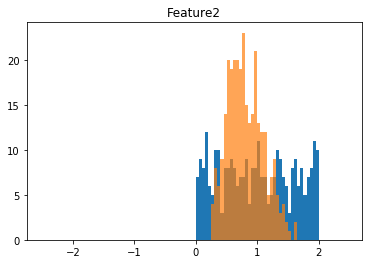

In [4]:
plt.hist(signal[:,1], bins = [ (x/20.-2.5) for x in range(100)]) 
plt.title("Feature2") 
plt.hist(background[:,1], bins = [ (x/20.-2.5) for x in range(100)],alpha=.7) #make it a bit transparent 
plt.show()

Scatter plotting  with feature x and y for the first 100 events of signal and background


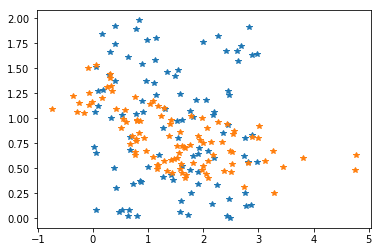

In [5]:
plt.plot(signal[0:100,0],signal[0:100,1],'*')
plt.plot(background[0:100,0],background[0:100,1],'*')
plt.show()



### Exercise
6. Try plotting 1D the other variables and plot other pairs of variables instead of (x,y) 
(if using a notepad, add yourself a code cell below this one)

Now we concatenate all data and shuffle it...
7. how would you check that shuffling really happened?


In [6]:
data=np.concatenate((background,signal))
np.random.shuffle(data)
print(data)
data_features=data[:,0:3]
data_labels=data[:,3:4]

[[ 0.05820122  1.53665825  0.99830679  0.        ]
 [ 1.55552809  0.64929939  0.01526764  0.        ]
 [ 2.03126319  0.6795916  -0.44436639  0.        ]
 ...
 [-0.10901617  1.40771525  0.99406362  0.        ]
 [ 1.35352739  0.65090997  0.21556357  0.        ]
 [ 1.10043384  1.35066511  0.08437829  1.        ]]


# Let's build a NN 

First we can try to just build a single hidden layer  FF network, aka MLP

### Exercise
8. After you run the whole thing once, come back here and try building your first  Deep Network with 3 or 4 hidden layers



In [7]:
inputs=Input(shape=(3,))
hidden=  Dense(10, activation='relu')(inputs)
outputs = Dense(1, activation='sigmoid')(hidden)
model = Model(input=inputs, output=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


And now let's fit it to our data.
The sample is automatically split in two so that 50% of it is used for validation and the other half for training


In [8]:
history=model.fit(data_features,data_labels,validation_split=0.5,epochs=150)

Instructions for updating:
Use tf.cast instead.
Train on 300 samples, validate on 300 samples
Epoch 1/150
300/300 [==============================] - 1s 3ms/step - loss: 0.7334 - acc: 0.5567 - val_loss: 0.7036 - val_acc: 0.5667
Epoch 2/150
300/300 [==============================] - 0s 75us/step - loss: 0.7260 - acc: 0.5133 - val_loss: 0.7028 - val_acc: 0.5267
Epoch 3/150
300/300 [==============================] - 0s 67us/step - loss: 0.7199 - acc: 0.4767 - val_loss: 0.7023 - val_acc: 0.4800
Epoch 4/150
300/300 [==============================] - 0s 70us/step - loss: 0.7147 - acc: 0.4533 - val_loss: 0.7015 - val_acc: 0.4467
Epoch 5/150
300/300 [==============================] - 0s 65us/step - loss: 0.7107 - acc: 0.4433 - val_loss: 0.7015 - val_acc: 0.3933
Epoch 6/150
300/300 [==============================] - 0s 67us/step - loss: 0.7067 - acc: 0.4067 - val_loss: 0.7007 - val_acc: 0.3833
Epoch 7/150
300/300 [==============================] - 0s 66us/step - loss: 0.7035 - acc: 0.4000 - val_

*history* contains information about the training.  We can now now show the loss vs epoch for both validation and training samples.

### Exercise
9. Try comparing the performance you get with a single layer MLP and a 4 hidden layers FF Deep Network
10. Try comparing this with nsamples=30 or =10 instead of 3000. Are the performance comparable? Is there overfit?



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


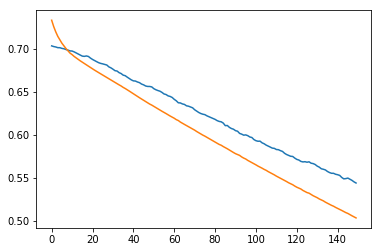

In [9]:
print(history.history.keys())
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.show()

In [10]:
preds=model.predict(data_features)
print(np.hstack( (preds,data_labels) )) #compare prediction and targets

[[0.3738814  0.        ]
 [0.49121052 0.        ]
 [0.38826677 0.        ]
 ...
 [0.25704864 0.        ]
 [0.54887384 0.        ]
 [0.64684373 1.        ]]


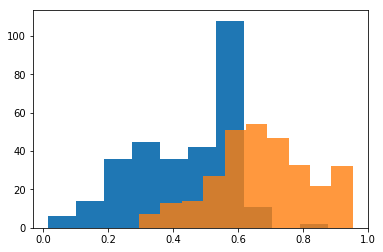

In [11]:
plt.hist(preds[(data_labels==0)])
plt.hist(preds[(data_labels==1)],alpha=0.8)
plt.show()